# ICPU Deloitte China

## Business Layers
### Step1: Import  Factors Data & Rename column names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.metrics import r2_score
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=196)
sns.set_palette("BuGn_r")

### 1.1: Data Cleaning and Average Filling

In [2]:
#Import data "new_data_two"
new_data_two = pd.read_csv('Raw_Data/Financial_new_two.csv')
new_data_two = pd.DataFrame(new_data_two)
new_data_two.shape

(192, 122)

In [3]:
#Rename column names and average filling NaN
column_name=new_data_two.columns.str
columns_name = column_name.split("_")
replace = []
for items in columns_name:
    replace.append(items[1])

new_data_two.columns = replace
for rows in new_data_two:
    null=new_data_two[rows].isnull()
    countnull=null.sum()
    if countnull>=20:
        new_data_two = new_data_two.drop(rows, 1)
        
new_data_two.fillna(new_data_two.mean(),inplace=True)
new_data_two

,Score,CompanyCode,Comcd,Lcomnm,Industry,InnovationInstitutions(%),CR8IndustryConcentration,PeriodIndustry,LaborIndustryDistribution,DistributionOfHighLevelTalents,...,CapitalFlow,TradeFlow,GlobalEconomicGrowthPosition,NationEconomicGrowthPosition,RuleOfLaw,TangiblePropertyRights,IntangiblePropertyRights,DisputeResolution,TaxIncentive,TaxBurden
0,73.5,39,C000016,康佳集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
1,71.5,43,C000020,深圳中恒华发股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
2,78.5,44,C000021,深圳长城开发科技股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
3,73.5,66,C000045,深圳市纺织(集团)股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
4,76.0,71,C000050,天马微电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
5,78.0,79,C000063,中兴通讯股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
6,71.0,81,C000066,中国长城科技集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
7,78.0,86,C000088,深圳市盐田港股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
8,79.0,87,C000089,深圳市机场股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802
9,76.5,91,C000100,TCL集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.64,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802


### 1.2 Add SFC punishment

In [4]:
# import SFC punichment data
punishment_data = pd.read_csv('Raw_Data/SFC_Punishment.csv')
punishment_data = pd.DataFrame(punishment_data)

In [5]:
# check SFC punishment data, add 1 mark if the company been punished between 2014-present
new_data_two['PunishmentScore']= 0
punish_list=list(punishment_data['Comcd'])

for i in range(len(new_data_two)):
    if new_data_two['Comcd'][i] in punish_list:
        
        new_data_two.loc[i, 'PunishmentScore'] += 1
        
new_data_two

,Score,CompanyCode,Comcd,Lcomnm,Industry,InnovationInstitutions(%),CR8IndustryConcentration,PeriodIndustry,LaborIndustryDistribution,DistributionOfHighLevelTalents,...,TradeFlow,GlobalEconomicGrowthPosition,NationEconomicGrowthPosition,RuleOfLaw,TangiblePropertyRights,IntangiblePropertyRights,DisputeResolution,TaxIncentive,TaxBurden,PunishmentScore
0,73.5,39,C000016,康佳集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
1,71.5,43,C000020,深圳中恒华发股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
2,78.5,44,C000021,深圳长城开发科技股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
3,73.5,66,C000045,深圳市纺织(集团)股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
4,76.0,71,C000050,天马微电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
5,78.0,79,C000063,中兴通讯股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
6,71.0,81,C000066,中国长城科技集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
7,78.0,86,C000088,深圳市盐田港股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
8,79.0,87,C000089,深圳市机场股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
9,76.5,91,C000100,TCL集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0


## Step 2: Train & Test 

In [6]:
# Separate Train(80%) and Test(20%) samples
train = new_data_two.sample(frac=0.8, random_state=1)
test = new_data_two[new_data_two.index.isin(train.index)==False].copy() 

In [7]:
# Train_x and Test_x are factors might influence scores, Train_y and Test_y are scores.
train_x = train.iloc[:,6:]
train_y=train['Score']
test_x=test.iloc[:,6:]
test_y=test['Score']

## Step 3: Exploratory Data Analyst (EDA)

### 3.1 Historgram of Score

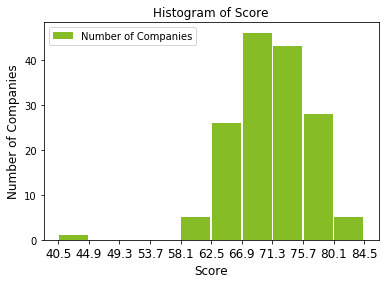

In [8]:
Score = train_y
n, bins, patches = plt.hist(Score, rwidth=0.95, bins=10, align ='mid', label = 'Number of Companies', color = "#86BC25")

plt.xticks(bins,size=12)
plt.xlabel('Score',size=12)
plt.ylabel('Number of Companies',size=12)
plt.title('Histogram of Score',size=12)
plt.legend()
plt.show()

### 3.2 Relationship with categorical variable

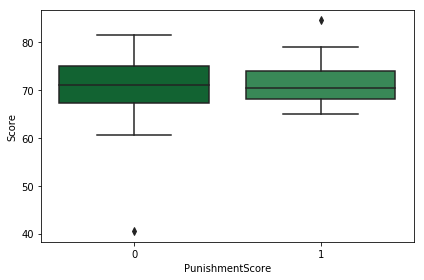

In [9]:
#Relationship between score and punishment history
sns.boxplot(x='PunishmentScore',y='Score',data=train)
plt.tight_layout()
plt.show()

In [10]:
train.groupby('PunishmentScore')['Score'].describe().round(3)
#The companies has already been punished tend to get higher score

,count,mean,std,min,25%,50%,75%,max
PunishmentScore,,,,,,,,
0,135.0,71.130,5.767,40.5,67.25,71.0,75.0,81.5
1,19.0,71.342,4.933,65.0,68.00,70.5,74.0,84.5


### 3.3 Relationship between Industry and Score

### Industry 1: Transportation, Warehousing and Postal Services
### Industry 2: Computer, Communications and Other Transportation Equipment Manufacturing
### Industry 3: Information Transport, Software and Information Technology Services

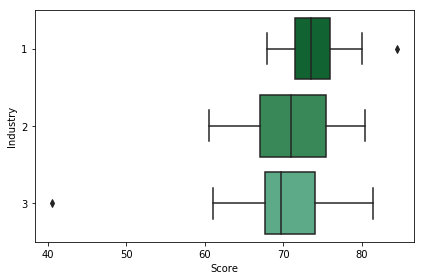

In [11]:
# Using Boxplot to group industry to analysis score
sns.boxplot(y='Industry' , x='Score',data=train, orient="h")

plt.tight_layout()
plt.show()

In [12]:
train.groupby('Industry')['Score'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
1,15.0,74.300,4.358,68.0,71.500,73.50,76.0,84.5
2,93.0,71.102,5.191,60.5,67.000,71.00,75.5,80.5
3,46.0,70.239,6.604,40.5,67.625,69.75,74.0,81.5


### 3.3 Relationship with numerical variable

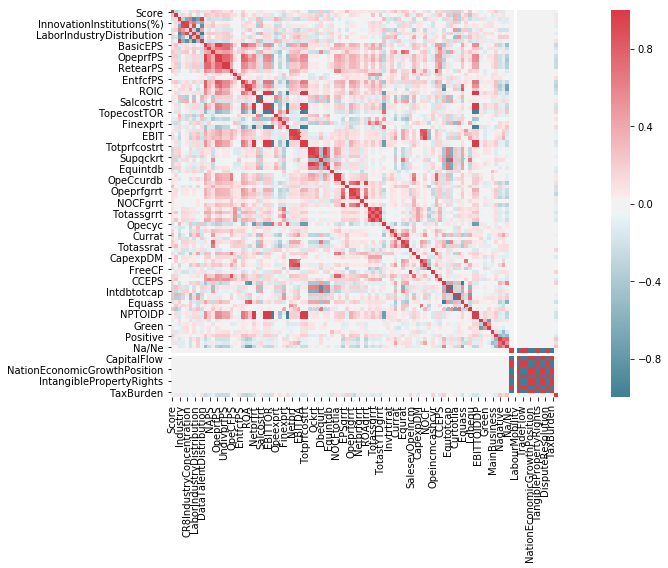

In [13]:
# Correlation
fig,ax=plt.subplots(figsize=(15,8))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(train.corr(),vmax=1,vmin=-1,center=0,square=True,ax=ax,cmap=cmap)
plt.tight_layout()
plt.show()

In [14]:
train.corr().round(3)

,Score,CompanyCode,Industry,InnovationInstitutions(%),CR8IndustryConcentration,PeriodIndustry,LaborIndustryDistribution,DistributionOfHighLevelTalents,DataTalentDistribution,BasicEPS,...,TradeFlow,GlobalEconomicGrowthPosition,NationEconomicGrowthPosition,RuleOfLaw,TangiblePropertyRights,IntangiblePropertyRights,DisputeResolution,TaxIncentive,TaxBurden,PunishmentScore
Score,1.000,-0.289,-0.173,-0.033,0.037,-0.183,0.120,0.188,-0.137,0.113,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.012
CompanyCode,-0.289,1.000,0.091,0.145,0.085,0.197,-0.008,-0.193,0.032,0.254,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.111
Industry,-0.173,0.091,1.000,-0.313,-0.631,0.662,-0.913,-0.713,0.955,-0.101,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.072
InnovationInstitutions(%),-0.033,0.145,-0.313,1.000,0.934,0.505,0.674,-0.442,-0.582,0.099,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.096
CR8IndustryConcentration,0.037,0.085,-0.631,0.934,1.000,0.164,0.893,-0.094,-0.833,0.119,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.105
PeriodIndustry,-0.183,0.197,0.662,0.505,0.164,1.000,-0.297,-0.997,0.409,-0.014,...,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.010
LaborIndustryDistribution,0.120,-0.008,-0.913,0.674,0.893,-0.297,1.000,0.364,-0.993,0.121,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.097
DistributionOfHighLevelTalents,0.188,-0.193,-0.713,-0.442,-0.094,-0.997,0.364,1.000,-0.473,0.023,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.002
DataTalentDistribution,-0.137,0.032,0.955,-0.582,-0.833,0.409,-0.993,-0.473,1.000,-0.118,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.092
BasicEPS,0.113,0.254,-0.101,0.099,0.119,-0.014,0.121,0.023,-0.118,1.000,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.270


### 3.4 Partial Dependence

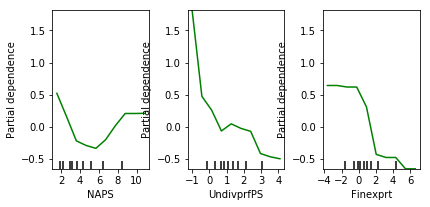

In [15]:
cols_to_use = ['NAPS', 'UndivprfPS', 'Finexprt','EBITDA','FreeCF','CCEPS',
               'Dbastrt','Equtotcap','Intdbtotcap','Curtotlia','Ldbequ',
              'Positive','Nagative','Na/P','PunishmentScore']

x=train_x[cols_to_use]


my_model = GradientBoostingRegressor()
my_model.fit(x,train_y )
my_plots_1 = plot_partial_dependence(my_model, 
                                   features=[0,1,2], 
                                   X=x, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)
plt.show()

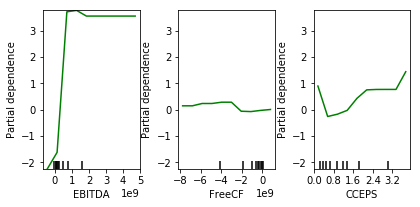

In [16]:
my_plots_2 = plot_partial_dependence(my_model, 
                                   features=[3,4,5], 
                                   X=x, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)
plt.show()

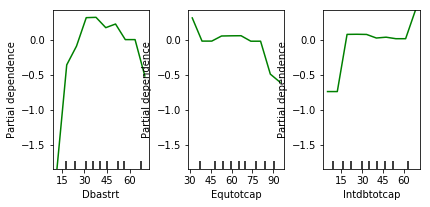

In [17]:
my_plots_3 = plot_partial_dependence(my_model, 
                                   features=[6,7,8], 
                                   X=x, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)
plt.show()

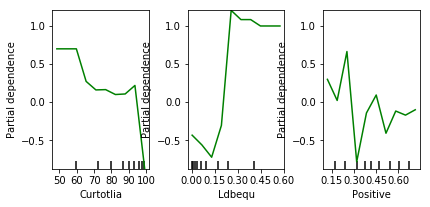

In [18]:
my_plots_4 = plot_partial_dependence(my_model, 
                                   features=[9,10,11], 
                                   X=x, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)
plt.show()

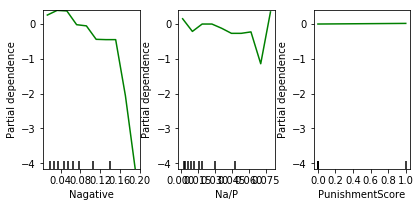

In [19]:
my_plots_5 = plot_partial_dependence(my_model, 
                                   features=[12,13,14], 
                                   X=x, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)
plt.show()

# Step 4: Feature Engineering

## 4.1 Logo Color (RGB analysis)

In [20]:
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn import metrics


In [21]:
r=train_x['Red'].values
g=train_x['Green'].values
b=train_x['Blue'].values

colour_col=['Red','Green','Blue']
colour=new_data_two[colour_col]


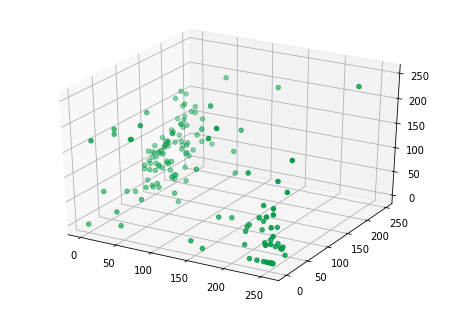

In [22]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(r,b,g,color='#009A44')
plt.show()

In [23]:
estimator = KMeans(n_clusters=3)#construct classifier
estimator.fit(colour)#clustering
label_pred = estimator.labels_ #获取聚类标签
print(label_pred)
print(len(label_pred))

[0 1 0 2 2 2 1 1 0 0 2 2 0 0 2 2 1 2 2 2 0 2 1 0 1 2 2 2 1 0 0 1 0 0 2 2 1
 0 2 1 0 2 1 0 1 1 2 2 2 2 2 1 0 1 2 0 1 1 0 2 0 2 0 1 2 2 2 0 1 0 0 1 1 0
 0 0 1 1 2 0 0 2 0 1 1 1 0 0 2 0 1 1 2 2 2 1 2 0 2 1 1 0 0 0 2 1 2 2 0 1 0
 2 0 2 1 2 0 1 1 1 2 1 2 2 1 0 0 1 0 2 2 2 2 2 1 2 0 2 2 0 2 2 0 0 0 0 2 1
 1 1 0 2 2 2 1 1 2 0 0 1 0 2 1 1 1 1 1 1 1 0 1 0 0 2 0 0 1 0 1 2 1 1 1 1 1
 1 1 2 1 1 0 1]
192


In [24]:
new_data_two['Logo_Colour']=0


for i in range(len(label_pred)):
    new_data_two.iloc[i,len(new_data_two.columns)-1]=label_pred[i]
    
new_data_two


,Score,CompanyCode,Comcd,Lcomnm,Industry,InnovationInstitutions(%),CR8IndustryConcentration,PeriodIndustry,LaborIndustryDistribution,DistributionOfHighLevelTalents,...,GlobalEconomicGrowthPosition,NationEconomicGrowthPosition,RuleOfLaw,TangiblePropertyRights,IntangiblePropertyRights,DisputeResolution,TaxIncentive,TaxBurden,PunishmentScore,Logo_Colour
0,73.5,39,C000016,康佳集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,0
1,71.5,43,C000020,深圳中恒华发股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,1
2,78.5,44,C000021,深圳长城开发科技股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,0
3,73.5,66,C000045,深圳市纺织(集团)股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,2
4,76.0,71,C000050,天马微电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,2
5,78.0,79,C000063,中兴通讯股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,2
6,71.0,81,C000066,中国长城科技集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,1
7,78.0,86,C000088,深圳市盐田港股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,1
8,79.0,87,C000089,深圳市机场股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,0
9,76.5,91,C000100,TCL集团股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0,0


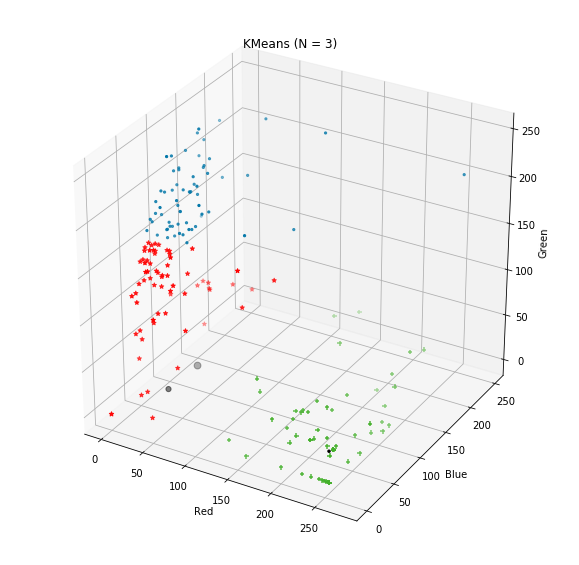

In [25]:
red_sample=[]
green_sample=[]
blue_sample=[]
for j in range(len(label_pred)):
    if label_pred[j]==0:
        red_sample.append((colour.iloc[j, 0],colour.iloc[j, 1],colour.iloc[j, 2]))
    elif label_pred[j]==1:
        green_sample.append((colour.iloc[j, 0],colour.iloc[j, 1],colour.iloc[j, 2]))
    else:
        blue_sample.append((colour.iloc[j, 0],colour.iloc[j, 1],colour.iloc[j, 2]))
    

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
red = np.array(red_sample)
green = np.array(green_sample)
blue = np.array(blue_sample)

centers=np.array(estimator.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],centers[:,2],marker=".", color='black')


plt.title("KMeans (N = 3)");
ax.set_xlabel('Red')
ax.set_ylabel('Blue')
ax.set_zlabel('Green')

ax.scatter(red[:, 0], red[:, 1], red[:, 2], c = '#43B02A', marker = '+')
ax.scatter(green[:, 0], green[:, 1], green[:,2], c = 'r', marker = '*')
ax.scatter(blue[:, 0], blue[:, 1], blue[:,2], c = '#0076A8', marker = '.')
plt.show()

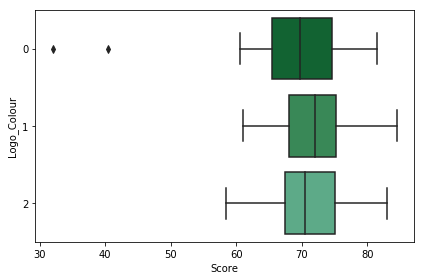

In [26]:
sns.boxplot(y='Logo_Colour',x='Score',data=new_data_two, orient="h")
plt.tight_layout()
plt.show()

In [27]:
new_data_two.groupby('Logo_Colour')['Score'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Logo_Colour,,,,,,,,
0,60.0,69.217,8.294,32.0,65.5,69.75,74.625,81.5
1,67.0,72.045,4.901,61.0,68.0,72.00,75.250,84.5
2,65.0,71.192,5.169,58.5,67.5,70.50,75.000,83.0


# Step 5: Model fitting & Factor selection

### 5.2 Model Selection: Model1 random forest to select factors

In [28]:
rfr=RandomForestRegressor(oob_score=True)

In [30]:
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=196)
#params_1 ={'n_estimators': list(range(10,100,10)),
        #'max_depth':[10,20,30,40,50],
#         'min_samples_split':[2,5,10],
#         'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5]}
# gs=GridSearchCV(rfr, param_grid=params_1,n_jobs=3)
# gs.fit(train_x,train_y)
# print(gs.scorer_)
# print(gs.best_params_, gs.best_score_)
# print(gs.best_estimator_)


In [31]:
rf_best =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.2, n_estimators=20,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [32]:
model=rf_best.fit(train_x,train_y)

In [33]:
ylog_pred = model.predict(X = test_x)

In [34]:
np.sqrt(np.mean((ylog_pred - test_y)**2)) 

7.790195373770571

In [35]:
train_x = train.iloc[:,6:]
train_y= train['Score']
features=train_x.columns.values
model=rfr.fit(train_x,train_y)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [36]:
# Define the feature impotance plot function
def feature_importance_plot(rf_best, labels, max_features = 20):
    importances = model.feature_importances_ *100
    indices = np.argsort(importances)
    table = pd.Series(importances, index=labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(12,8))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='b', width=0.8, linewidth=0.8, alpha=0.7, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='b', width=0.8, linewidth=0.8, alpha=0.8, ax=ax)
    ax.tick_params(axis=u'y', length=0)
    ax.set_title('Variable Importance', fontsize=12)
    sns.despine()
    return fig, ax

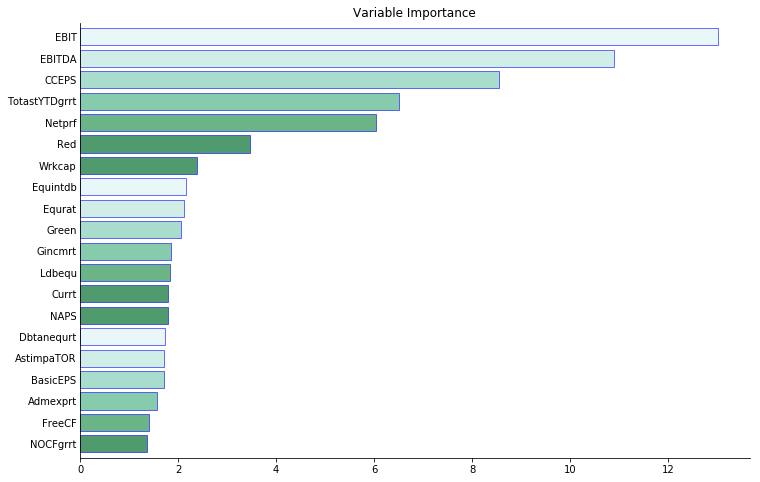

In [37]:
feature_importance_plot(model,labels=features, max_features=20)
plt.show()

### Industry 1: Transportation, Warehousing and Postal Services

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


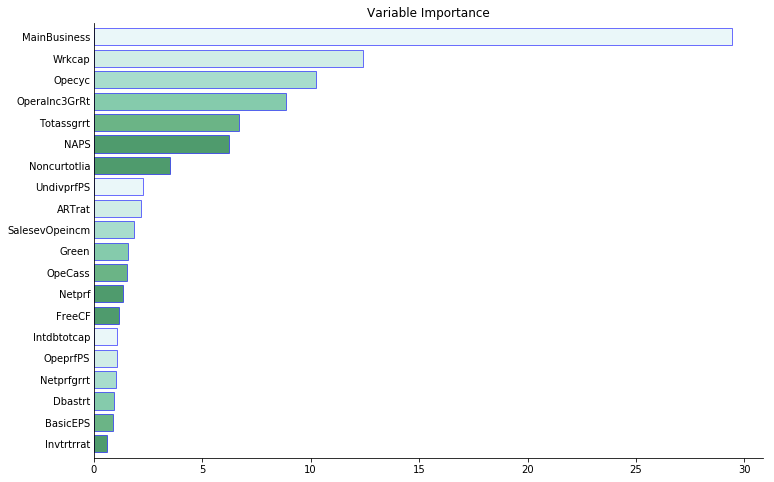

In [38]:
# Industry1
train_industry1 = train.loc[(train['Industry']==1)]
train_industry1_x = train_industry1.iloc[:,6:]
train_industry1_y= train_industry1['Score']

model_industry1=rfr.fit(train_industry1_x,train_industry1_y)

feature_importance_plot(model_industry1,labels=features, max_features=20)
plt.show()




### Industry 2: Computer, Communications and Other Transportation Equipment Manufacturing

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


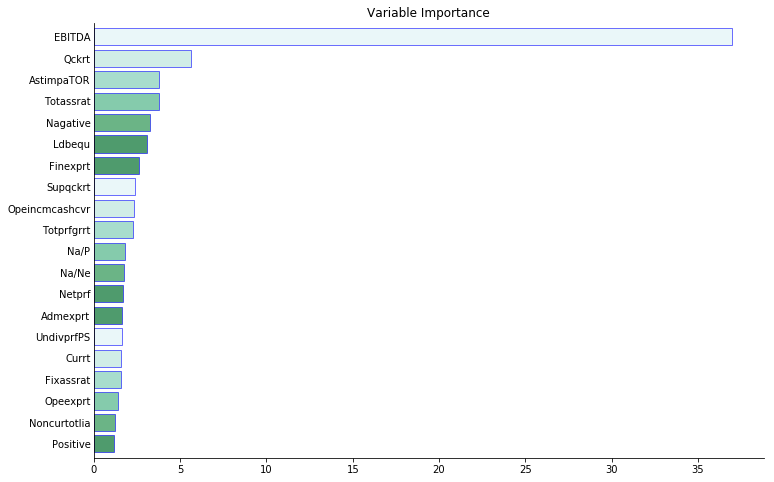

In [39]:
# Industry 2
train_industry2 = train.loc[(train['Industry']==2)]
train_industry2_x = train_industry2.iloc[:,6:]
train_industry2_y=train_industry2['Score']

model_industry2=rfr.fit(train_industry2_x,train_industry2_y)


feature_importance_plot(model_industry2,labels=features, max_features=20)
plt.show()

### Industry 3: Information Transport, Software and Information Technology Services

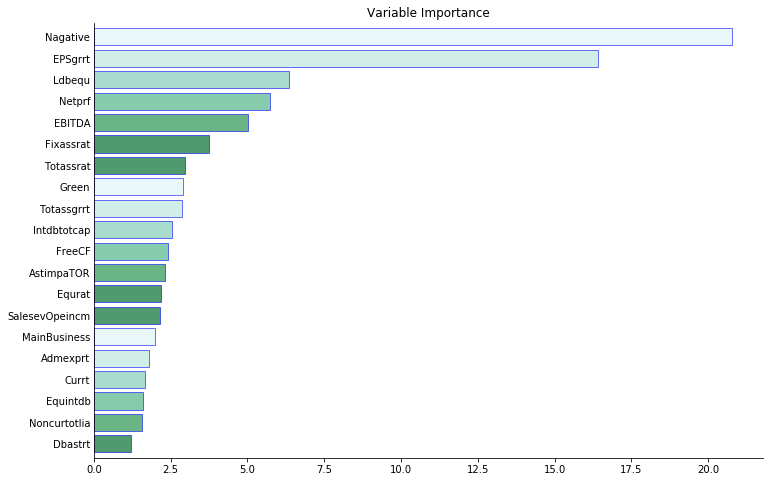

In [40]:
train_industry3 = train.loc[(train['Industry']==3)]
train_industry3_x = train_industry3.iloc[:,6:]
train_industry3_y=train_industry3['Score']

model_industry3=rfr.fit(train_industry3_x,train_industry3_y)
feature_importance_plot(model_industry3,labels=features, max_features=20)
plt.show()

## Model Evaluation: Use rfr predict Score (test)

In [41]:
Y_predrfr=model.predict(test_x)
ID = test['Comcd']
predDf = pd.DataFrame({'Comcd':ID,'PredicScore':Y_predrfr})
predDf.to_csv('PredictScore_rfr.csv',index=False)

In [42]:
predict_data = pd.read_csv('Raw_Data/PredictScore_rfr.csv')
predict_data = pd.DataFrame(predict_data)
list_one=list(test_y)
predict_data['RealScore']=list_one
predict_data

,Comcd,PredicScore,RealScore
0,C000020,68.70,71.5
1,C000088,74.45,78.0
2,C000089,71.20,79.0
3,C002055,76.45,70.5
4,C002106,71.40,72.0
5,C002138,73.25,79.5
6,C002288,63.95,71.0
7,C002359,64.90,32.0
8,C002475,75.35,83.0
9,C002587,72.95,75.5


## rmse compare predict score with real score

In [43]:
se = 0
for i in range(len(predict_data)):
    a=np.square((predict_data['RealScore'][i]-predict_data['PredicScore'][i]))
    se=se+a

rmse=np.sqrt(se/len(predict_data))
print(rmse)

7.79049691003489


In [44]:
test

,Score,CompanyCode,Comcd,Lcomnm,Industry,InnovationInstitutions(%),CR8IndustryConcentration,PeriodIndustry,LaborIndustryDistribution,DistributionOfHighLevelTalents,...,TradeFlow,GlobalEconomicGrowthPosition,NationEconomicGrowthPosition,RuleOfLaw,TangiblePropertyRights,IntangiblePropertyRights,DisputeResolution,TaxIncentive,TaxBurden,PunishmentScore
1,71.5,43,C000020,深圳中恒华发股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
7,78.0,86,C000088,深圳市盐田港股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
8,79.0,87,C000089,深圳市机场股份有限公司,1,0.032,0.3991,0,0.4780,0.4350,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
20,70.5,3708,C002055,深圳市得润电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
22,72.0,4051,C002106,深圳莱宝高科技股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
25,79.5,4446,C002138,深圳顺络电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
30,71.0,75101,C002288,广东超华科技股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
37,32.0,78163,C002359,北讯集团股份有限公司,3,0.060,0.3287,1,0.0289,0.1273,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,1
50,83.0,80190,C002475,立讯精密工业股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0
57,75.5,151325,C002587,深圳市奥拓电子股份有限公司,2,0.192,0.4970,1,0.4234,0.1414,...,0.85,1.6,0.73,0.52,0.69,0.95,0.7,0.33,0.802,0


### 5.2 Method Selection: method 2 lasso

In [45]:
from sklearn.linear_model import LassoCV
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=10)),
])

model2=lasso.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.576632189649672, tolerance: 0.43353641304347834
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7274965674146188, tolerance: 0.43353641304347834
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.522994103348083, tolerance: 0.43353641304347834
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Ve

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.92721143102176, tolerance: 0.46147047101449273
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.499790759796042, tolerance: 0.46147047101449273
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.866006952194311, tolerance: 0.46147047101449273
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Ve

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.312350359927677, tolerance: 0.4592269927536231
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.213472449585424, tolerance: 0.4592269927536231
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.864597811323165, tolerance: 0.4592269927536231
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Vers

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.762801337939436, tolerance: 0.4620777173913043
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.0292688125835, tolerance: 0.4620777173913043
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.03721973860229, tolerance: 0.4620777173913043
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.51155935279917, tolerance: 0.4639438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.65109316347002, tolerance: 0.4639438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.48107525747287, tolerance: 0.4639438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Ver

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.80508895692219, tolerance: 0.4297438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.758413968811738, tolerance: 0.4297438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.706665204394994, tolerance: 0.4297438848920863
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Vers

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.33754440421535, tolerance: 0.4388406474820144
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.615534142288652, tolerance: 0.4388406474820144
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.965616349982838, tolerance: 0.4388406474820144
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Vers

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.25148964401842, tolerance: 0.43142805755395686
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.172764006877287, tolerance: 0.43142805755395686
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.67575780177708, tolerance: 0.43142805755395686
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Ve

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.765541314816119, tolerance: 0.37101223021582735
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.302550764043644, tolerance: 0.37101223021582735
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8188688401919535, tolerance: 0.37101223021582735
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/V

In [46]:
reg = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

89

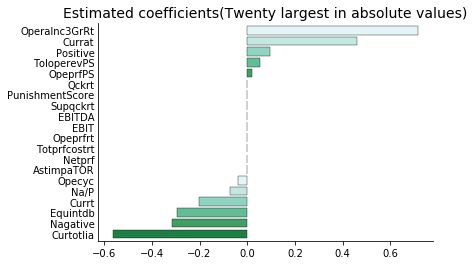

In [47]:
def plot_coefficients(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.8, linewidth=.4, alpha=.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients(Twenty largest in absolute values)', fontsize=14)
    sns.despine()
    return fig, ax

plot_coefficients(reg, train_x.columns.values)
plt.show()

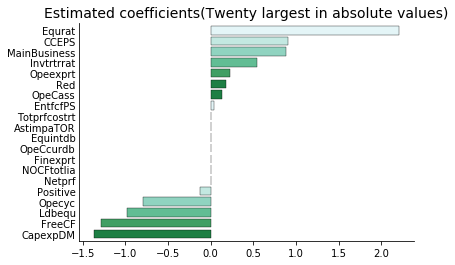

In [48]:
lasso_industry1=lasso.fit(train_industry1_x, train_industry1_y)
reg_industry1 = lasso_industry1._final_estimator
plot_coefficients(reg_industry1, train_industry1_x.columns.values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2650909350529673, tolerance: 0.21574216867469878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.404605240064825, tolerance: 0.21574216867469878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.228674780940878, tolerance: 0.21574216867469878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.17329504868934, tolerance: 0.22381987951807233
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.395291908328943, tolerance: 0.22381987951807233
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.586539741055049, tolerance: 0.22381987951807233
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_mo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.019347179853781, tolerance: 0.2251367469879518
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.127765700902444, tolerance: 0.2251367469879518
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.56545236783427, tolerance: 0.2251367469879518
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_mo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.277680168935575, tolerance: 0.23037232142857142
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.68908369553185, tolerance: 0.23037232142857142
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.026881019048062, tolerance: 0.23037232142857142
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3733754790140438, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3706180337208025, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3412671552860047, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.70320208430519, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.7949507683615, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.926377493991424, tolerance: 0.20714523809523808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_m

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.29988656306131, tolerance: 0.2161238095238095
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.18480461471955, tolerance: 0.2161238095238095
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.191241991400375, tolerance: 0.2161238095238095
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_mod

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6132741526012637, tolerance: 0.2308059523809524
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7067348440521641, tolerance: 0.2308059523809524
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3020744843909142, tolerance: 0.2308059523809524
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_m

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36798085447270523, tolerance: 0.23021041666666667
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4125633956849697, tolerance: 0.23021041666666667
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5386922319707423, tolerance: 0.23021041666666667
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/line

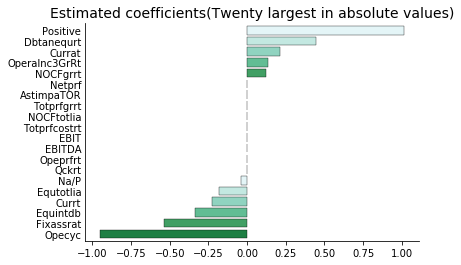

In [49]:
lasso_industry2=lasso.fit(train_industry2_x, train_industry2_y)
reg_industry2 = lasso_industry2._final_estimator
plot_coefficients(reg_industry2, train_industry2_x.columns.values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2114449715340072, tolerance: 0.19103048780487808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.158036164094625, tolerance: 0.19103048780487808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4271132806339608, tolerance: 0.19103048780487808
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3963415175684659, tolerance: 0.18165975609756102
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4597779486202569, tolerance: 0.18165975609756102
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33432071114734185, tolerance: 0.18165975609756102
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/line

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17355051886934758, tolerance: 0.1653780487804878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16658809335026126, tolerance: 0.1653780487804878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17068188924354488, tolerance: 0.1653780487804878
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3932435662693261, tolerance: 0.19293333333333335
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.41003900033887186, tolerance: 0.19293333333333335
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38413665549061116, tolerance: 0.19293333333333335
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/lin

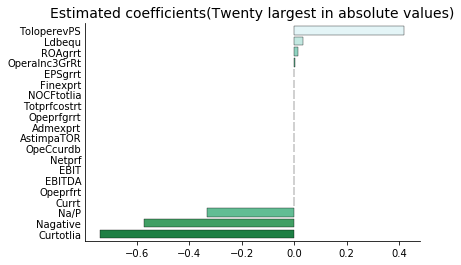

In [50]:
lasso_industry3=lasso.fit(train_industry3_x, train_industry3_y)
reg_industry3 = lasso_industry3._final_estimator
plot_coefficients(reg_industry3, train_industry3_x.columns.values)
plt.show()

## Model Evaluation: Use lasso to predict score

In [51]:
Y_predlasso=model2.predict(test_x)
ID = test['Comcd']
predDf = pd.DataFrame({'Comcd':ID,'PredicScore':Y_predlasso})
predDf.to_csv('PredictScore_lasso.csv',index=False)

In [52]:
predict_data_lasso = pd.read_csv('Raw_Data/PredictScore_lasso.csv')
predict_data_lasso = pd.DataFrame(predict_data_lasso)
list_one=list(test_y)
predict_data_lasso['RealScore']=list_one
predict_data_lasso

,Comcd,PredicScore,RealScore
0,C000020,69.634505,71.5
1,C000088,73.708517,78.0
2,C000089,66.957909,79.0
3,C002055,72.403461,70.5
4,C002106,71.251188,72.0
5,C002138,71.095674,79.5
6,C002288,66.433226,71.0
7,C002359,66.789394,32.0
8,C002475,71.218449,83.0
9,C002587,70.302446,75.5


In [53]:
sum_error = 0
for i in range(len(predict_data_lasso)):
    b=np.square((predict_data_lasso['RealScore'][i]-predict_data_lasso['PredicScore'][i]))
    sum_error=sum_error+b


rmse2=np.sqrt(sum_error/len(predict_data_lasso))
print(rmse2)

8.174579825843805


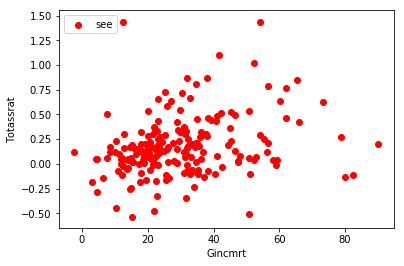

ValueError: could not convert string to float: '广东飞企互联科技股份有限公司'

In [54]:
# X = new_data_two
 
# # 绘制数据分布图
# plt.scatter(X['Gincmrt'], X['OpeCcurdb'], c="red", marker='o', label='see')  
# plt.xlabel('Gincmrt')  
# plt.ylabel('Totassrat')  
# plt.legend(loc=2)  
# plt.show()  
 
# estimator = KMeans(n_clusters=3)  # 构造聚类器
# estimator.fit(X)  # 聚类
# label_pred = estimator.labels_  # 获取聚类标签
# # 绘制k-means结果
# x0 = X[label_pred == 0]
# x1 = X[label_pred == 1]
# x2 = X[label_pred == 2]

# plt.scatter(x0['Gincmrt'], x0['OpeCcurdb'], c="red", marker='o', label='label0')  
# plt.scatter(x1['Gincmrt'], x1['OpeCcurdb'], c="green", marker='*', label='label1')  
# plt.scatter(x2['Gincmrt'], x2['OpeCcurdb'], c="blue", marker='+', label='label2')  
# plt.xlabel('Gincmrt')  
# plt.ylabel('Totassrat')  
# plt.legend(loc=2)  
# plt.show() 